# TVA

In [1]:
import warnings

warnings.filterwarnings("ignore")

from src import utils
from src.utils import VotingSchemas
from src.outcomes import *
from src.happiness_level import HappinessLevel
from src.strategic_voting_risk import StrategicVoting
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"

## Input Voting Preference

In [3]:
voting = utils.read_voting(path_voting, table_name="voting5")
voting.to_pandas()

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5
preference_0,C,B,C,C,B,A
preference_1,A,D,D,D,A,D
preference_2,D,C,A,B,D,B
preference_3,B,A,B,A,C,C


## Voting Outcomes

In [4]:
outcomes = all_schemas_outcomes(voting)
outcomes_df = all_schemas_outcomes_to_pandas(outcomes)
outcomes_df

,A,B,C,D,Winner
Plurality Voting,1,2,3,0,C
Voting for Two,3,2,3,4,D
Veto Voting,4,4,4,6,D
Borda Voting,8,8,10,10,C


## Happiness Level

### Plurality Voting

Voters Happiness Level


,Happiness Level
voter_0,1.000000
voter_1,0.410487
voter_2,1.000000
voter_3,1.000000
voter_4,0.000000
voter_5,0.000000



Overall Happiness Level: 3.410486590766719

Happiness Level Distribution


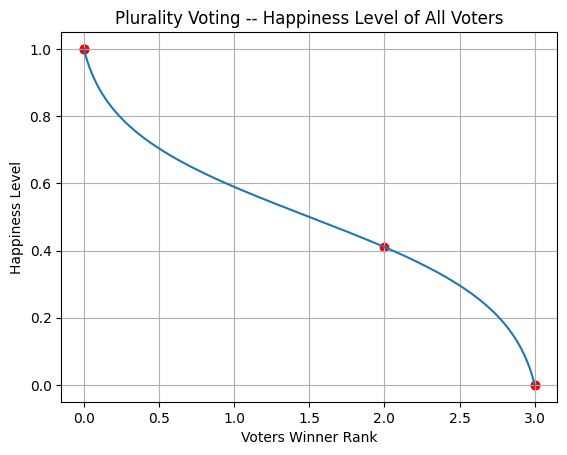


Histogram of Happiness Level


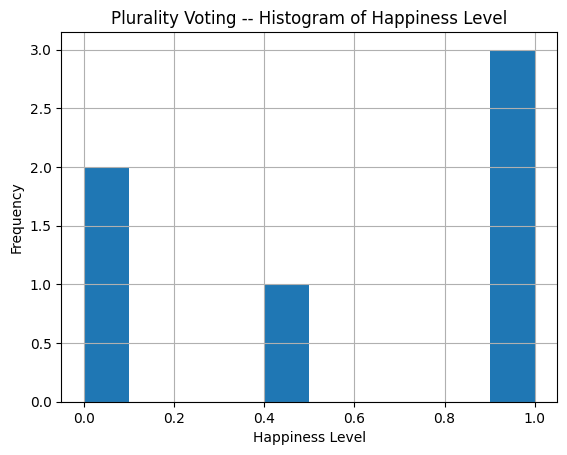

In [5]:
pv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.PLURALITY_VOTING.value].winner,
    VotingSchemas.PLURALITY_VOTING,
).run(show=True)

### Voting for Two

Voters Happiness Level


,Happiness Level
voter_0,0.410487
voter_1,0.589513
voter_2,0.589513
voter_3,0.589513
voter_4,0.410487
voter_5,0.589513



Overall Happiness Level: 3.1790268184665624

Happiness Level Distribution


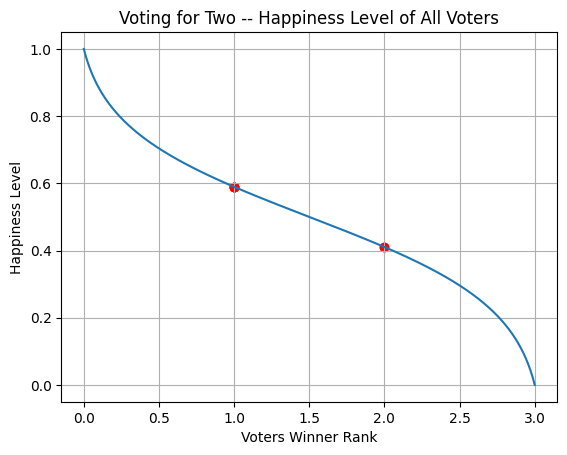


Histogram of Happiness Level


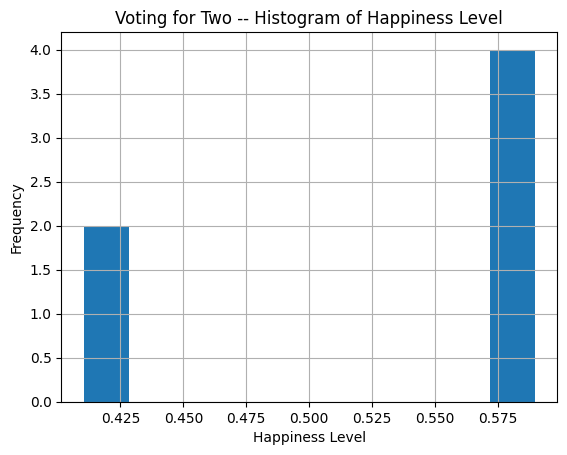

In [6]:
vt_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.VOTING_FOR_TWO.value].winner,
    VotingSchemas.VOTING_FOR_TWO,
).run(show=True)

### Veto Voting

Voters Happiness Level


,Happiness Level
voter_0,0.410487
voter_1,0.589513
voter_2,0.589513
voter_3,0.589513
voter_4,0.410487
voter_5,0.589513



Overall Happiness Level: 3.1790268184665624

Happiness Level Distribution


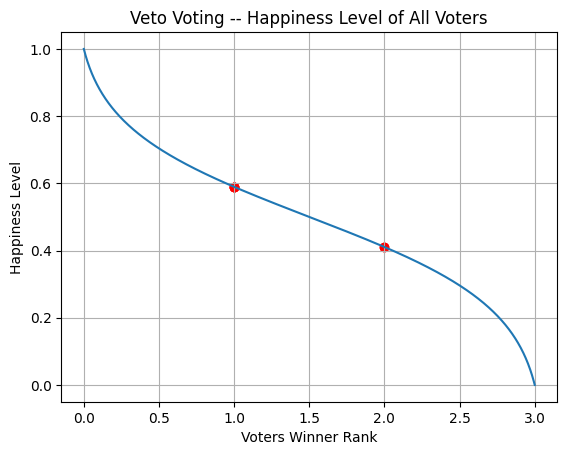


Histogram of Happiness Level


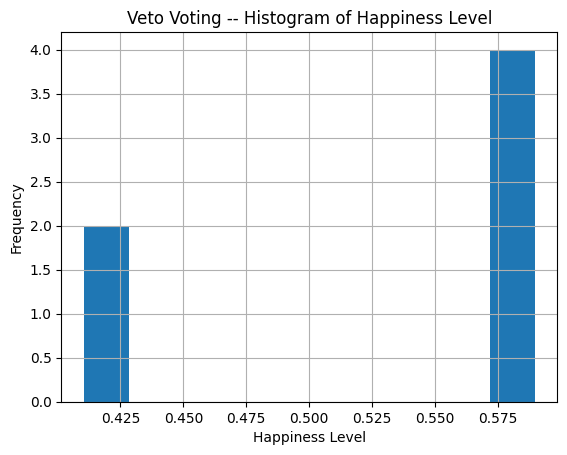

In [7]:
vv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.VETO_VOTING.value].winner,
    VotingSchemas.VETO_VOTING,
).run(show=True)

### Borda Voting

Voters Happiness Level


,Happiness Level
voter_0,1.000000
voter_1,0.410487
voter_2,1.000000
voter_3,1.000000
voter_4,0.000000
voter_5,0.000000



Overall Happiness Level: 3.410486590766719

Happiness Level Distribution


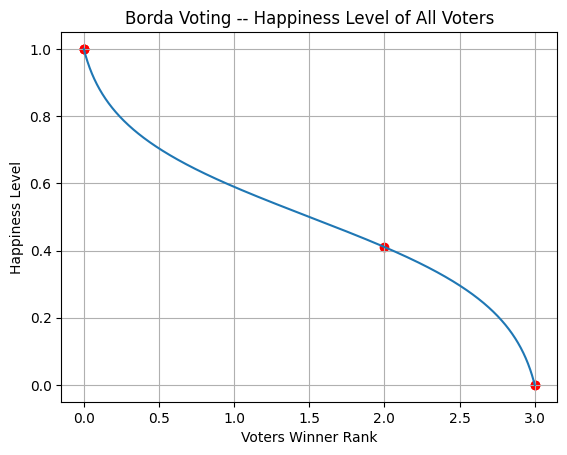


Histogram of Happiness Level


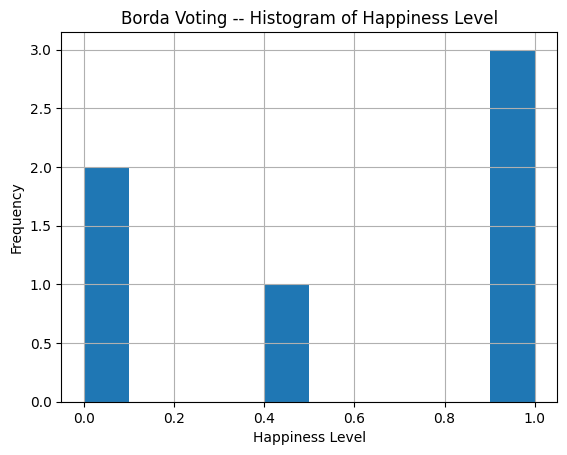

In [8]:
bv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.BORDA_VOTING.value].winner,
    VotingSchemas.BORDA_VOTING,
).run(show=True)

## Strategic Voting

### Plurality Voting

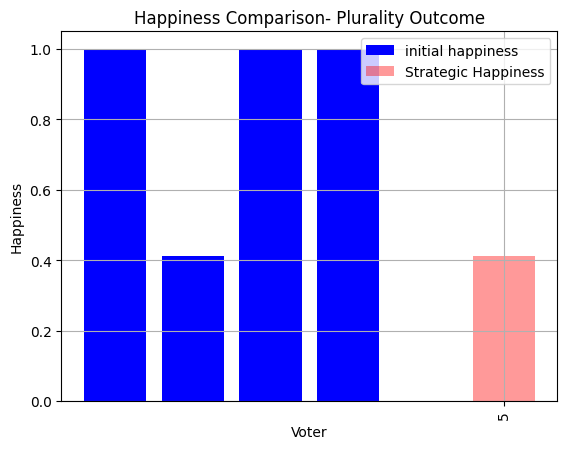

In [17]:
pv_s = StrategicVoting(voting, pv_h, plurality_outcome).run(show=True)

plurality_all = pv_s.all
plurality_best = pv_s.best

plt.bar(range(pv_h.voter.shape[0]),pv_h.voter, color = 'blue',alpha = 'o.5' label = 'initial happiness')

if not plurality_best.empty:
    plt.bar(plurality_best['voter'], plurality_best['strategic_H'], color='red', alpha=0.4, label='Strategic Happiness')

    plt.title('Happiness Comparison')
    plt.xlabel('Voter')
    plt.ylabel('Happiness')

    plt.grid(True)

    plt.xticks(plurality_best['voter'], rotation=90)

    plt.legend()


plt.show()

### Voting for Two

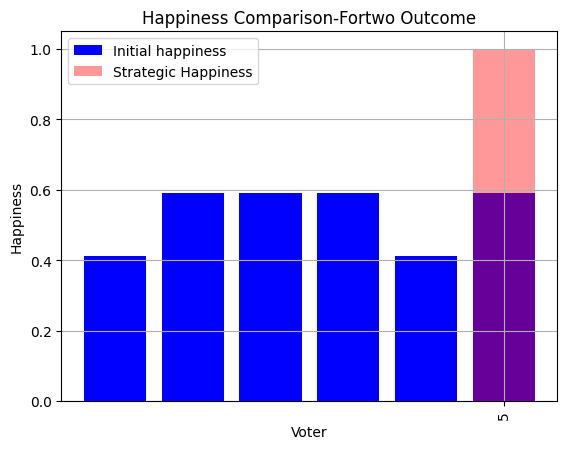

In [16]:
fortwo_best = StrategicVoting(voting, vt_h, for_two_outcome).run().best

plt.bar(range(vt_h.voter.shape[0]),vt_h.voter, color = 'blue', label = 'Initial happiness')

if not fortwo_best.empty:
    plt.bar(fortwo_best['voter'], fortwo_best['strategic_H'], color='red', alpha=0.4, label='Strategic Happiness')

    plt.title('Happiness Comparison-Fortwo Outcome')
    plt.xlabel('Voter')
    plt.ylabel('Happiness')

    plt.grid(True)

    plt.xticks(plurality_best['voter'], rotation=90)

    plt.legend()


plt.show()

### Veto Voting

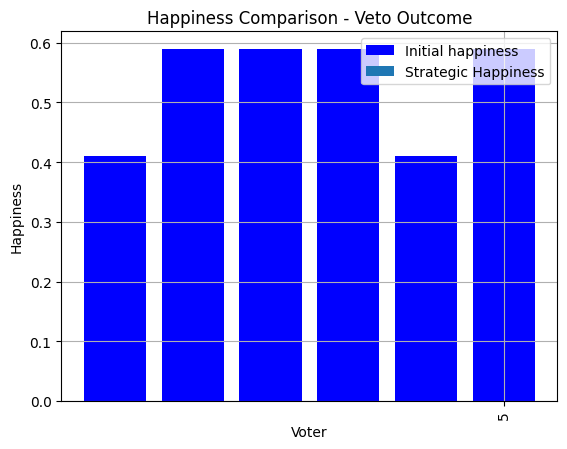

In [19]:
veto_best = StrategicVoting(voting, vv_h, veto_outcome).run().best

plt.bar(range(vv_h.voter.shape[0]),vv_h.voter, color = 'blue', label = 'Initial happiness')

if not fortwo_best.empty:
    plt.bar(veto_best['voter'], veto_best['strategic_H'], color='red', alpha=0.4, label='Strategic Happiness')

    plt.title('Happiness Comparison - Veto Outcome')
    plt.xlabel('Voter')
    plt.ylabel('Happiness')

    plt.grid(True)

    plt.xticks(plurality_best['voter'], rotation=90)

    plt.legend()


plt.show()

### Borda Voting

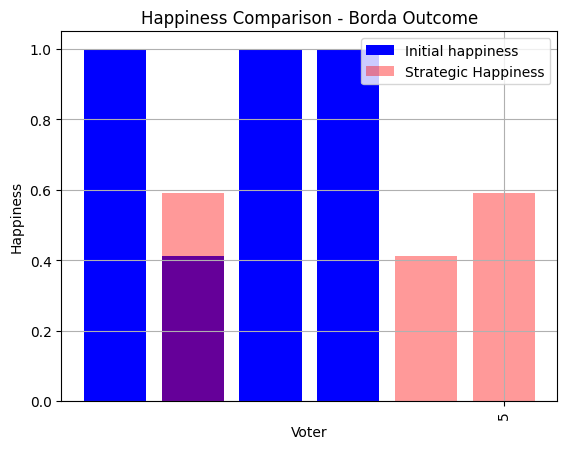

In [20]:
borda_best = StrategicVoting(voting, bv_h, borda_outcome).run().best

plt.bar(range(bv_h.voter.shape[0]),bv_h.voter, color = 'blue', label = 'Initial happiness')

if not fortwo_best.empty:
    plt.bar(borda_best['voter'], borda_best['strategic_H'], color='red', alpha=0.4, label='Strategic Happiness')

    plt.title('Happiness Comparison - Borda Outcome')
    plt.xlabel('Voter')
    plt.ylabel('Happiness')

    plt.grid(True)

    plt.xticks(plurality_best['voter'], rotation=90)

    plt.legend()


plt.show()